##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [8]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [9]:
df= pd.read_csv('Shcroder_Dana_Prestasi.csv.xls')

In [10]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","41,571.809","41,579.250","41,947.180","41,446.172",0.21%
1,"Dec 04, 2022","41,486.531","42,892.961","42,892.961","41,486.531",-3.83%
2,"Nov 27, 2022","43,138.121","42,160.719","43,138.121","42,160.719",2.35%
3,"Nov 20, 2022","42,149.219","41,742.398","42,307.609","41,606.281",1.25%
4,"Nov 13, 2022","41,630.238","41,851.000","41,923.559","41,431.441",-1.33%
...,...,...,...,...,...,...
275,"Aug 06, 2017","37,096.809","36,793.531","37,428.410","36,793.531",0.56%
276,"Jul 30, 2017","36,890.941","37,448.352","37,448.352","36,890.941",-1.65%
277,"Jul 23, 2017","37,508.059","37,626.809","37,698.961","37,508.059",0.41%
278,"Jul 16, 2017","37,354.090","37,929.328","37,929.328","37,354.090",-1.65%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      280 non-null    object
 1   Price     280 non-null    object
 2   Open      280 non-null    object
 3   High      280 non-null    object
 4   Low       280 non-null    object
 5   Change %  280 non-null    object
dtypes: object(6)
memory usage: 13.2+ KB


In [12]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      280 non-null    datetime64[ns]
 1   Price     280 non-null    float64       
 2   Open      280 non-null    float64       
 3   High      280 non-null    float64       
 4   Low       280 non-null    float64       
 5   Change %  280 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.2 KB


In [14]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,41571.809,41579.250,41947.180,41446.172,0.21
1,2022-12-04,41486.531,42892.961,42892.961,41486.531,-3.83
2,2022-11-27,43138.121,42160.719,43138.121,42160.719,2.35
3,2022-11-20,42149.219,41742.398,42307.609,41606.281,1.25
4,2022-11-13,41630.238,41851.000,41923.559,41431.441,-1.33
...,...,...,...,...,...,...
275,2017-08-06,37096.809,36793.531,37428.410,36793.531,0.56
276,2017-07-30,36890.941,37448.352,37448.352,36890.941,-1.65
277,2017-07-23,37508.059,37626.809,37698.961,37508.059,0.41
278,2017-07-16,37354.090,37929.328,37929.328,37354.090,-1.65


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

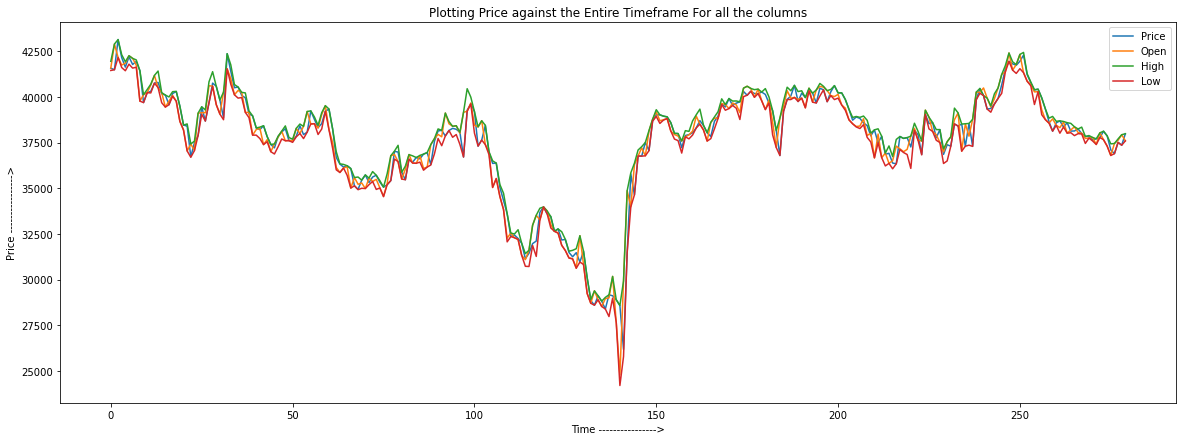

In [15]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [16]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [17]:
df

,index,Date,Price,Open,High,Low,Change %
0,279,2017-07-09,37982.359,37593.949,37982.359,37591.031,0.30
1,278,2017-07-16,37354.090,37929.328,37929.328,37354.090,-1.65
2,277,2017-07-23,37508.059,37626.809,37698.961,37508.059,0.41
3,276,2017-07-30,36890.941,37448.352,37448.352,36890.941,-1.65
4,275,2017-08-06,37096.809,36793.531,37428.410,36793.531,0.56
...,...,...,...,...,...,...,...
275,4,2022-11-13,41630.238,41851.000,41923.559,41431.441,-1.33
276,3,2022-11-20,42149.219,41742.398,42307.609,41606.281,1.25
277,2,2022-11-27,43138.121,42160.719,43138.121,42160.719,2.35
278,1,2022-12-04,41486.531,42892.961,42892.961,41486.531,-3.83


In [18]:
new_df=df[['Date','High','Low']]

In [19]:
new_df=new_df.set_index(['Date'])

In [20]:
new_df

,High,Low
Date,,
2017-07-09,37982.359,37591.031
2017-07-16,37929.328,37354.090
2017-07-23,37698.961,37508.059
2017-07-30,37448.352,36890.941
2017-08-06,37428.410,36793.531
...,...,...
2022-11-13,41923.559,41431.441
2022-11-20,42307.609,41606.281
2022-11-27,43138.121,42160.719


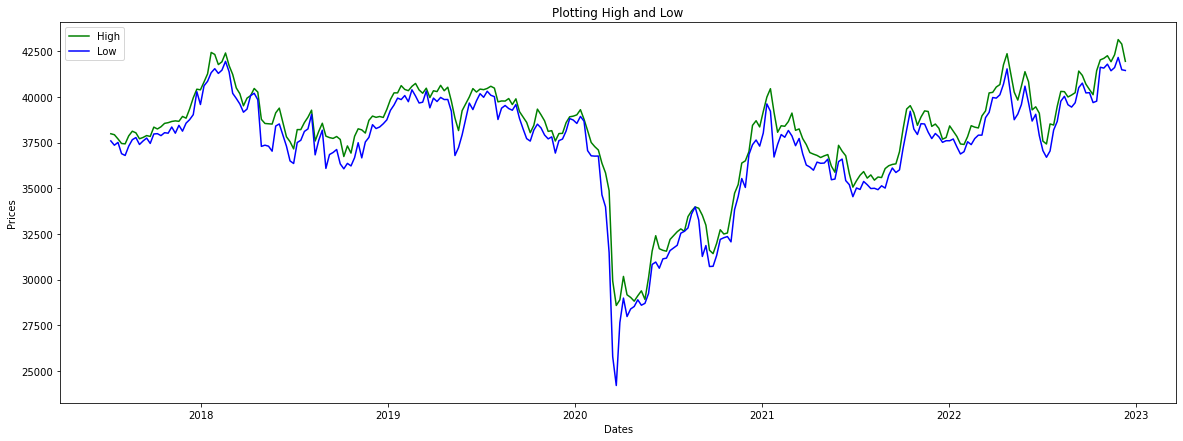

In [21]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Plotting High and Low')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1152x648 with 0 Axes>

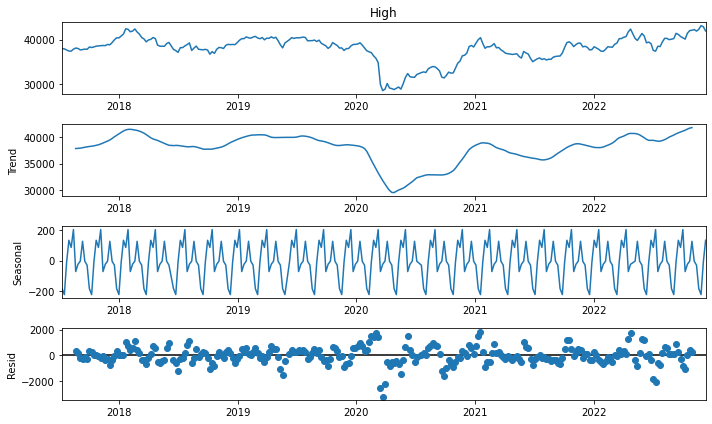

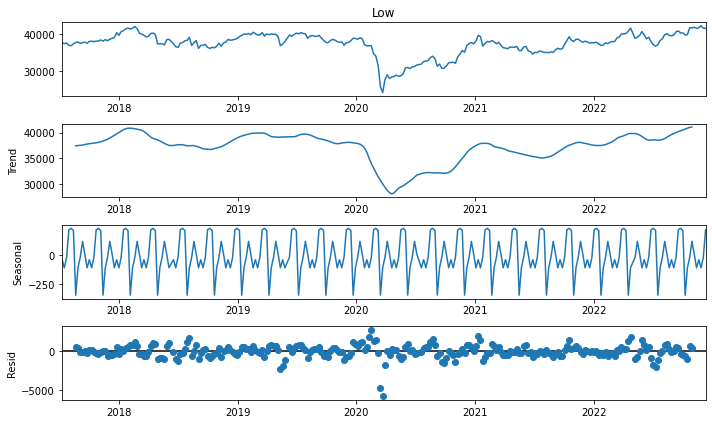

In [23]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

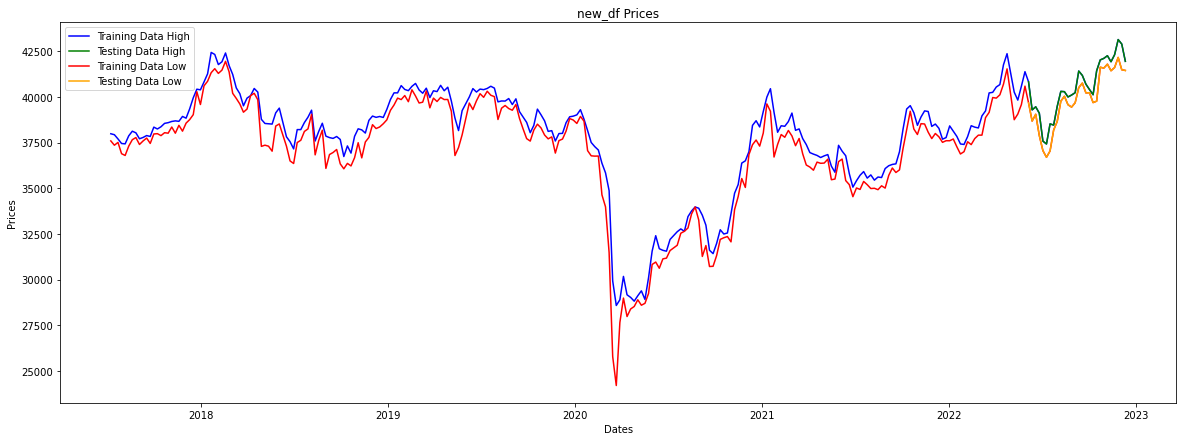

In [24]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [25]:
train_data

,High,Low
Date,,
2017-07-09,37982.359,37591.031
2017-07-16,37929.328,37354.090
2017-07-23,37698.961,37508.059
2017-07-30,37448.352,36890.941
2017-08-06,37428.410,36793.531
...,...,...
2022-04-24,42365.230,41534.289
2022-05-08,40261.238,38750.172
2022-05-15,39824.660,39059.301


In [41]:
test_data

,High,Low
Date,,
2022-06-05,40824.020,39673.539
2022-06-12,39288.129,38677.160
2022-06-19,39457.020,39047.621
2022-06-26,39106.961,37880.301
2022-07-03,37579.199,37059.738
2022-07-10,37421.281,36693.449
2022-07-17,38519.398,37039.309
2022-07-24,38458.559,38185.922
2022-07-31,39484.879,38657.672


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [26]:
!pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4506.625, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4475.805, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4459.531, Time=0.54 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4499.739, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=4440.720, Time=2.13 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=4471.523, Time=0.83 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=4442.632, Time=4.67 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=4442.651, Time=5.10 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4445.169, Time=0.55 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=4463.935, Time=0.39 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=inf, Time=1.81 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=4447.649, Time=0.61 sec
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=4442.029, Time=0.55 sec
 ARIMA(0,1,2)(1,1,1)[4]             : AIC=4441.119, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[4]             : 

In [28]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=4646.637, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=4615.924, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=4596.457, Time=0.28 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=4646.355, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[4]             : AIC=4576.396, Time=0.79 sec
 ARIMA(0,1,1)(1,1,0)[4]             : AIC=4611.521, Time=0.28 sec
 ARIMA(0,1,1)(2,1,1)[4]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,1)(1,1,2)[4]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,1)(0,1,2)[4]             : AIC=4582.063, Time=0.68 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=4602.848, Time=0.41 sec
 ARIMA(0,1,1)(2,1,2)[4]             : AIC=inf, Time=1.37 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=4576.619, Time=0.19 sec
 ARIMA(1,1,1)(1,1,1)[4]             : AIC=inf, Time=0.91 sec
 ARIMA(0,1,2)(1,1,1)[4]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=4576.493, Time=0

In [29]:
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(1,1,1))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [32]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(1,1,1))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

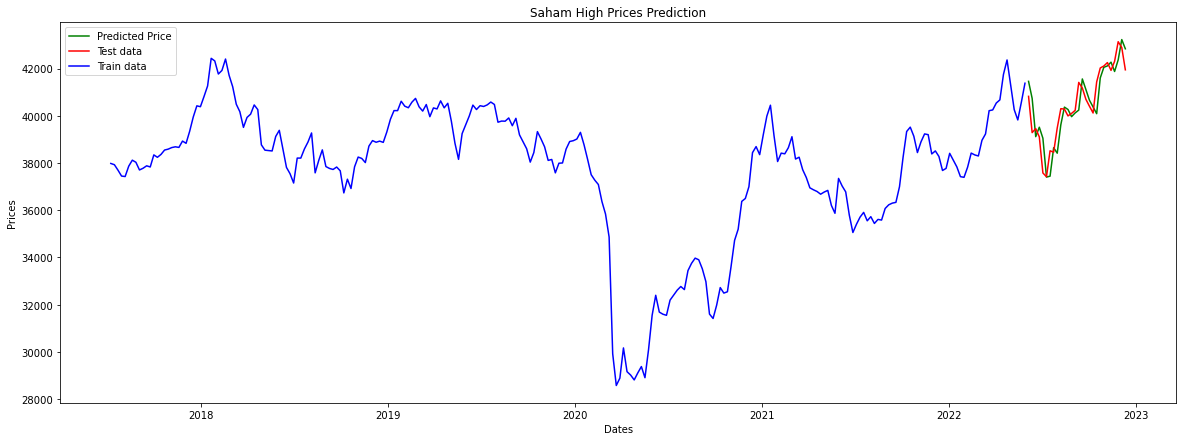

In [33]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

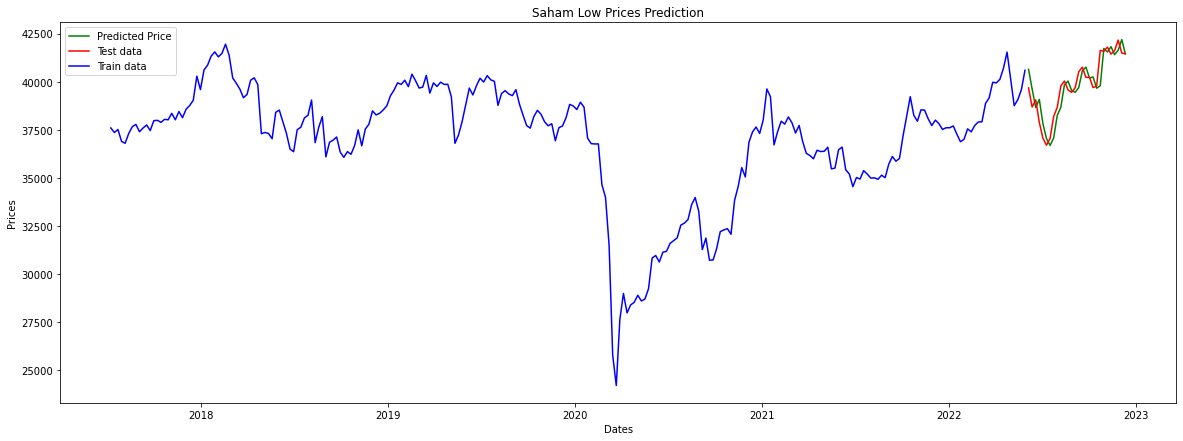

In [34]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [35]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,40824.020,41459.010474,39673.539,40638.661506
1,39288.129,40739.940766,38677.160,39613.461220
2,39457.020,39116.793696,39047.621,38647.530661
3,39106.961,39516.771006,37880.301,39076.325676
4,37579.199,39051.253325,37059.738,37813.438030
5,37421.281,37404.534573,36693.449,37042.083630
6,38519.398,37444.177919,37039.309,36680.702888
7,38458.559,38648.915836,38185.922,37061.650673
8,39484.879,38417.038879,38657.672,38238.723285
9,40301.309,39618.928261,39762.410,38664.701300


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [37]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [38]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,37980.186214,541.344290,482462.099598,694.594918,0.013428
1,Low,37285.042261,533.870189,462037.261719,679.733228,0.013476


## **7. Prediction**

In [39]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [40]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,42845.568553
2022-12-25,42844.454175
2023-01-01,42844.612456
2023-01-08,42844.589974


In [42]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,41454.081536
2022-12-25,41449.969456
2023-01-01,41451.195739
2023-01-08,41450.830043


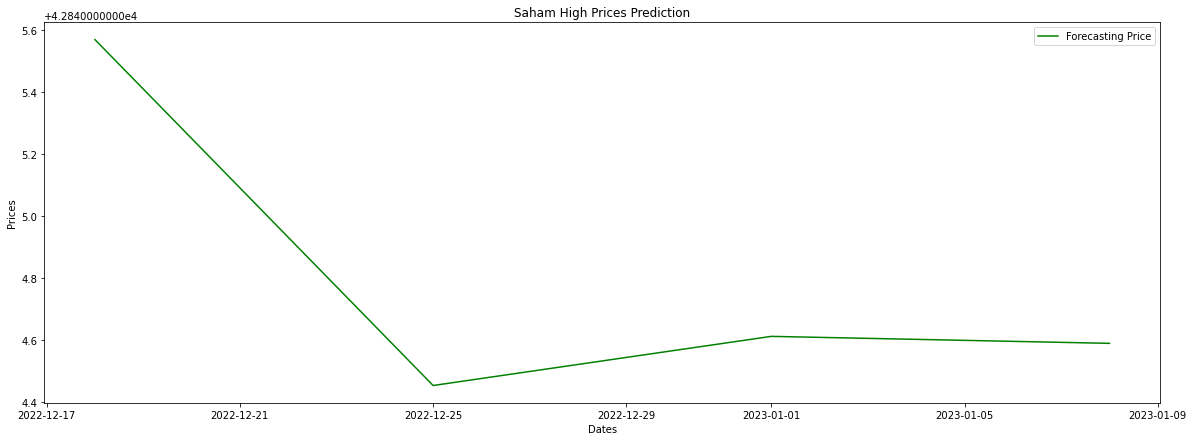

In [43]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='Forecasting Price')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

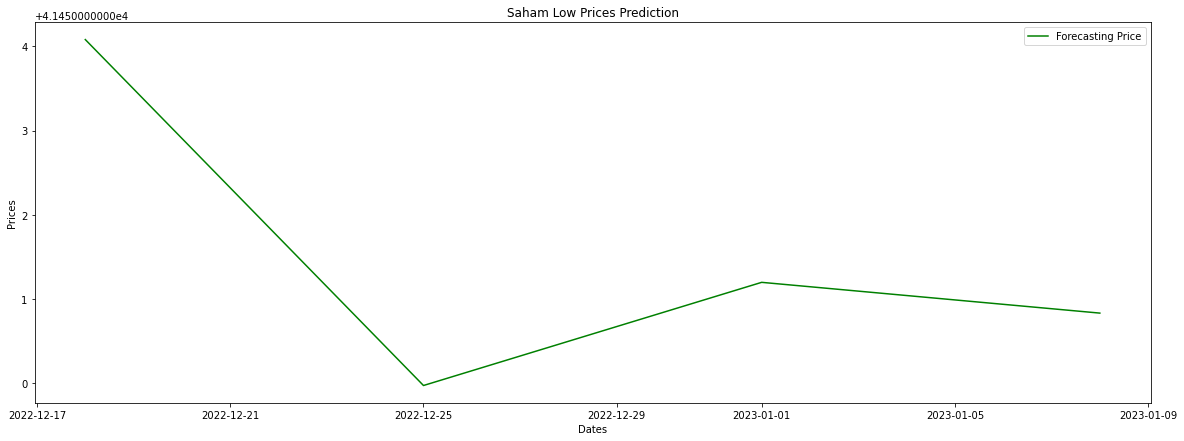

In [44]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Forecasting Price')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()